# Exercício Visualização de Dados

**Dupla**: 

Gabriel Viana Raulino - 509291 

Kauan Oliveira Perdigão Lopes - 514867

Pergunta de pesquisa: **Quais bairros são mais afetados por problemas de infraestrutura?**


## **Considerações inicias:** 
### Foi utilizado um filtro no site do dataset para reduzir o tamanho do csv e remover previamente algumas informações desnecessárias.
### **Filtro 1**: Foi inserido apenas as ocorrências das datas entre 2020 Jan 01 12:00:00 AM a 2025 Jan 01 12:00:00 AM
### **Filtro 2**: Foi utilizado apenas as seguintes colunas
- **Created Date**
- **Complaint Type**
- **Location Type**
- **Street Name**
- **City**

In [54]:
import pandas as pd

df = pd.read_csv('311.csv')

df

,Created Date,Complaint Type,Location Type,Street Name,City
0,12/31/2024 11:59:38 PM,Illegal Fireworks,Street/Sidewalk,AVENUE C,NaN
1,12/31/2024 11:59:33 PM,Noise - Residential,Residential Building/House,EAST 230 STREET,BRONX
2,12/31/2024 11:59:32 PM,Noise - Residential,Residential Building/House,MALCOLM X BOULEVARD,BROOKLYN
3,12/31/2024 11:59:31 PM,Noise - Residential,Residential Building/House,EAST 230 STREET,BRONX
4,12/31/2024 11:59:21 PM,Noise - Residential,Residential Building/House,NEWKIRK AVENUE,BROOKLYN
...,...,...,...,...,...
11351135,07/24/2021 03:27:02 PM,Noise - Residential,Residential Building/House,PARKVILLE AVENUE,BROOKLYN
11351136,07/24/2021 03:27:00 PM,Request Large Bulky Item Collection,Sidewalk,EAST 18 STREET,BROOKLYN
11351137,07/24/2021 03:27:00 PM,Sanitation Condition,Street,REMSEN AVENUE,BROOKLYN
11351138,07/24/2021 03:26:24 PM,Homeless Person Assistance,Street/Sidewalk,NINTH AVENUE,MANHATTAN


#### Aqui podemos ver a quantidade de elementos null em cada coluna

In [55]:
value_counts = df[['Created Date','Complaint Type', 'Location Type', 'Street Name', 'City']].isnull().sum()
print(value_counts)
unique_values = df[['Created Date','Complaint Type', 'Location Type', 'Street Name', 'City']].nunique()
print(unique_values)
# df['Complaint Type'].value_counts()
# df['Location Type'].value_counts()
# df['Street Name'].value_counts()
# df['City'].value_counts()


Created Date            0
Complaint Type          0
Location Type     1387599
Street Name        470139
City               579810
dtype: int64
Created Date      9235527
Complaint Type        254
Location Type         195
Street Name         17088
City                  546
dtype: int64


In [56]:
# import warnings
# warnings.filterwarnings('ignore')
# # Verificar valores ausentes nas colunas de interesse
# missing_values = df[['Created Date', 'Complaint Type', 'Location Type', 'Street Name', 'City']].isnull().sum()

# # Converter a coluna "Created Date" para o formato de data
# df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')

# # Exibir estatísticas dos valores ausentes
# missing_values

In [57]:
# Preenchimento de valores ausentes
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


df['Location Type'] = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
df['Street Name'] = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])

# Criar um dicionário de mapeamento "Street Name" -> "City" com a cidade mais frequente por rua
street_to_city = df.dropna(subset=['City']).groupby('Street Name')['City'].agg(lambda x: x.mode()[0]).to_dict()

# Preencher os valores ausentes na coluna "City" com base no mapeamento das ruas
df['City'] = df['City'].fillna(df['Street Name'].map(street_to_city))

# Verificar novamente os valores ausentes
missing_values_final = df[['Location Type', 'Street Name', 'City']].isnull().sum()

# Exibir os valores ausentes após tratamento
missing_values_final


Location Type    0
Street Name      0
City             0
dtype: int64

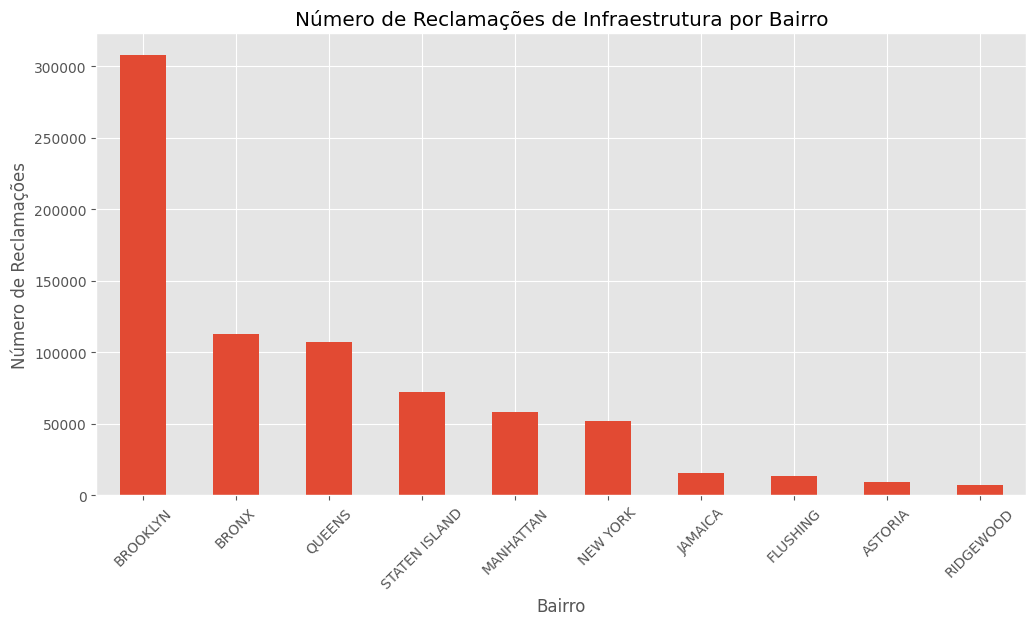

In [58]:
# Lista de tipos de reclamação relacionadas à infraestrutura urbana
infra_complaints = [
    "Street Condition", "Street Light Condition", "Sidewalk Condition", 
    "Building/Use", "Sewer", "Traffic Signal Condition", "Damaged Tree", "Construction"
]

# Filtrar apenas os dados de infraestrutura
df_infra = df[df['Complaint Type'].isin(infra_complaints)]

# Contar as reclamações por cidade
infra_complaints_by_city = df_infra['City'].value_counts().head(10)

# Exibir os dados em um gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
infra_complaints_by_city.plot(kind='bar')
plt.title("Número de Reclamações de Infraestrutura por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Número de Reclamações")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Contagem dos tipos de reclamações relacionadas a infraestrutura
import matplotlib.pyplot as plt

# Configurar o estilo dos gráficos
plt.style.use('ggplot')

# Plotar os tipos de reclamações relacionadas a infraestrutura
plt.figure(figsize=(10, 6))
top_complaints.plot(kind='bar', color='skyblue')
plt.title('Top 10 Tipos de Reclamações Relacionadas a Infraestrutura')
plt.xlabel('Tipo de Reclamação')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotar as reclamações por cidade
plt.figure(figsize=(10, 6))
complaints_by_city.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Bairros com Mais Reclamações')
plt.xlabel('Bairro')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotar as reclamações por nome de rua
plt.figure(figsize=(10, 6))
complaints_by_street.plot(kind='bar', color='salmon')
plt.title('Top 10 Ruas com Mais Reclamações')
plt.xlabel('Nome da Rua')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()
top_complaints = df['Complaint Type'].value_counts().head(10)


